In [61]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [140]:
path = "C:\\Users\\John\\Desktop\\photoZ_visual\\PhotoZ_upgrades\\UnitTest1\\TestData\\"

image_version = "5"

height = 5 # height of the final image
quadrantSize = 5120 * 2
delim='\t'

height *= 2
final = np.genfromtxt(path + "OutputCDS-" + image_version + ".txt", delimiter = '\t')
processed = np.genfromtxt(path + "Output-" + image_version + ".txt", delimiter = '\t')
raw = np.genfromtxt(path + "RLI-" + image_version + ".txt", delimiter = delim)


raw_img = raw[:quadrantSize,1].reshape(height,-1)
processed_img = processed[:quadrantSize,1].reshape(height,-1)
final_img = final[:quadrantSize // 2,1].reshape(height // 2,-1) # CDS-correct image is half the height. Reset rows were removed


print("Shaping final image to:",height // 2, quadrantSize // height)
print(raw_img.shape, processed_img.shape, final_img.shape)


Shaping final image to: 5 1024
(10, 1024) (10, 1024) (5, 1024)


<IPython.core.display.Javascript object>


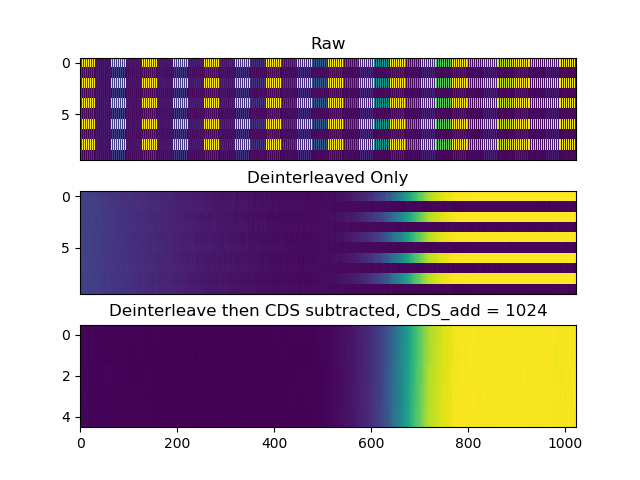

In [141]:
fig = plt.figure()

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)


ax1.set_title("Raw")
ax2.set_title("Deinterleaved Only")
ax3.set_title("Deinterleave then CDS subtracted, CDS_add = 1024")

ax2.imshow(processed_img, aspect='auto')
ax1.imshow(raw_img, aspect='auto')
ax3.imshow(final_img, aspect='auto')


fig.subplots_adjust(hspace = 0.3)

ax2.axes.xaxis.set_visible(False)
ax1.axes.xaxis.set_visible(False)

plt.show()
plt.savefig('readout-RLI-' + image_version + ".png")